# Statistical Simulations

This portfolio example will deal with various statistical problems while showcasing my skills in Python programming language.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import math

## Part 1. Statistical Permutation Test: Does Beer Consumption Increase Human Attractiveness to Mosquitos?

In this part I will be dealing with a classical statistical problem and applying computational method as solution to that problem. For more detailed explanation of this statistical problem, please refer to this video: https://www.youtube.com/watch?v=5Dnw46eC-0o

In [2]:
# Reading and displaying dataset
df = pd.read_csv("mosquitos_data.csv")
df

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


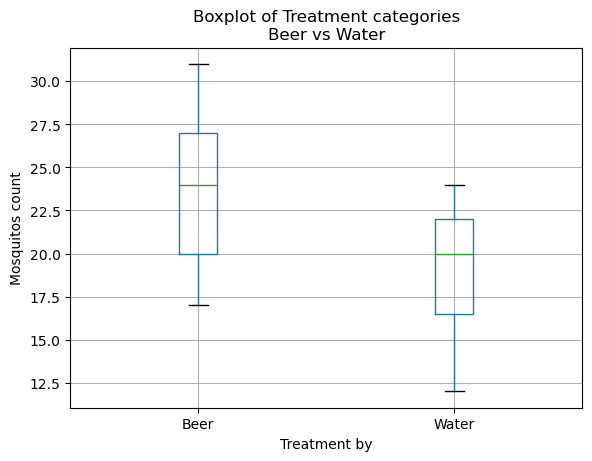

In [3]:
# Producing boxplot by Treatment categories
ax = df.boxplot(by = "Treatment")
plt.suptitle('Boxplot of Treatment categories')
ax.set_title('Beer vs Water')
ax.set_xlabel("Treatment by")
ax.set_ylabel("Mosquitos count");

In [4]:
# Calculating basic statistical measures
df_grouped = round(df.groupby("Treatment").agg(["sum", "mean", "median", "std"]),2)
df_grouped

Response                    
               sum   mean median   std
Treatment                             
Beer           590  23.60   24.0  4.13
Water          346  19.22   20.0  3.67

In [5]:
# Establishing mean difference between beer and water
mean_diff = round(df_grouped.iloc[0,1] - df_grouped.iloc[1,1], 1)
mean_diff 

4.4

**PRELIMINARY INSIGHTS**

The dataset contains 43 records of treatment patients, split between 25 who received treatment by beer and 18 by water. 

The boxplot suggests that there is an association/correlation between beer consumption and attractiveness to mosquitos. From boxplot and table we can see that patients who received treatment by beer attracted 23.6 mosquitos on average, whereas treatment by water - 19.22 on average. Moreover, beer treatment attracted 590 mosquitos in total and water only 346. The middle value/median for patients who consumed beer sits at 24 and for water at 20. Standard deviation for beer consumption is at 4.13 and for water 3.67, which describes variability of the data in each category. Beer category has higher variability than water.

Lastly, patients who received treatment by beer attracted 4.4 on average more mosquitos.

Null Hypothesis(H0): Patients with treatment by beer on average attracted more mosquitos (4.4 on average to be exact), therefore there is an association/correlation between beer consumpation and attractiveness to mosquitos.

Having made this preliminary conclusion/hypothesis that patients who received treatment by beer attract more mosquitos, we have to run a larger number of experiments assuming that there is no association between beer consumption and attractiveness to mosquitos. In other words, this means that if we shuffle original response data in a totally random way we should receive a similar difference number. If this mean difference number is much lower than what we saw in the original experiment, we could conclude that there is an association between beer consumption and attractiveness to mosquitos. Following the distribution of mean difference numbers we can assess whether 4.4 difference is statistically significant.


In [6]:
# Runing 10 000 experiments on randomly shuffled data

experiments = 10000 # Setting the number of experiments

beer_means = []
water_means = []
differences = []

for e in range(experiments):
    array = df["Response"].to_numpy() # Creating a numpy array from the dataframe
    np.random.shuffle(array) # Randomly shuffling an array
    beer_array = array[0:24] # Splitingan array into beer array
    water_array = array[25:42] # Spliting an array into water array
    beer_mean = round(np.mean(beer_array),2) # Calculating beer mean
    water_mean = round(np.mean(water_array),2) # Calculating water mean
    difference = round(beer_mean - water_mean,1) # Calculating difference between beer and water means
    beer_means.append(beer_mean) # Recording value
    water_means.append(water_mean) # Recording value
    differences.append(difference) # Recording value

    
    
combined_df = pd.DataFrame({'Beer Mean': beer_means, 'Water Mean': water_means, 'Difference': differences}) # Creating dataframe of all experiments
combined_df

,Beer Mean,Water Mean,Difference
0,21.96,21.35,0.6
1,22.25,20.71,1.5
2,21.67,21.82,-0.1
3,21.75,22.06,-0.3
4,22.12,21.18,0.9
...,...,...,...
9995,21.67,22.00,-0.3
9996,22.17,21.59,0.6
9997,22.54,20.35,2.2
9998,22.17,20.65,1.5


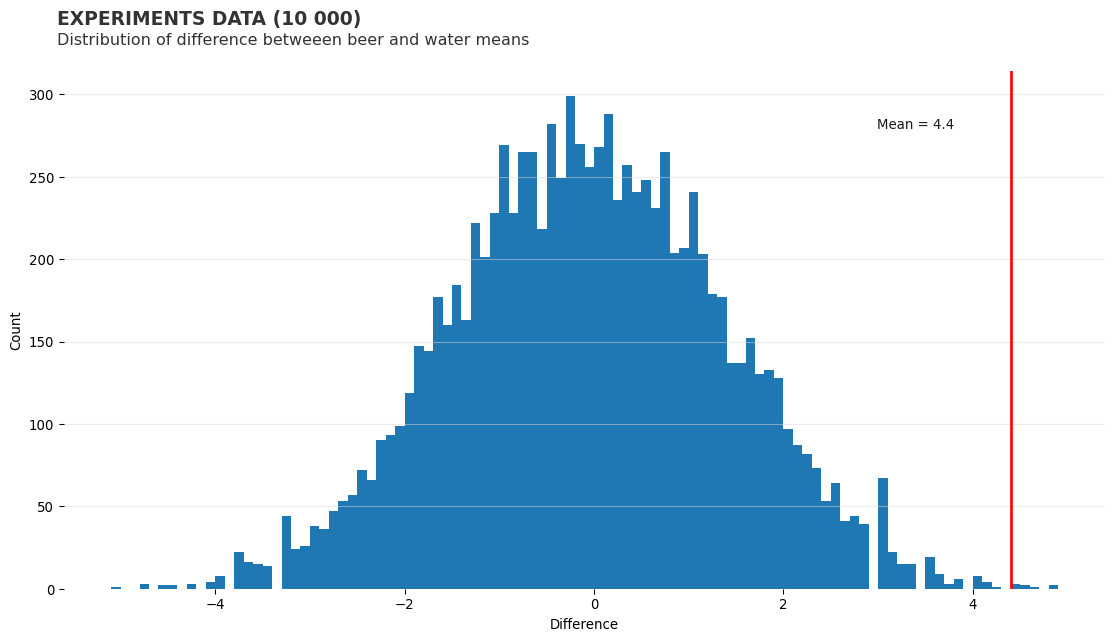

In [7]:
# Visualizing the data of 10 000 experiments

fig, ax = plt.subplots(figsize = (14, 7), dpi = 96)

ax.spines[['top','left','bottom', 'right']].set_visible(False)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5)

ax.hist(combined_df["Difference"], bins = 100)

ax.axvline(mean_diff, color='r', linewidth=2)
ax.set_xlabel("Difference")
ax.set_ylabel("Count")

ax.text(x=0.12, y=.95, s="EXPERIMENTS DATA (10 000)", transform=fig.transFigure, fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.92, s="Distribution of difference betweeen beer and water means", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

ax.text(x=.73, y=.795, s='Mean = 4.4', transform=fig.transFigure, size=10, alpha=.9);

In [8]:
# Filtering subsets of mean difference with >= 4.4
morethan4_4 = combined_df[combined_df['Difference'] >= 4.4] 
morethan4_4

,Beer Mean,Water Mean,Difference
3304,23.54,18.88,4.7
3917,23.92,19.29,4.6
4440,23.96,19.06,4.9
5039,23.71,19.24,4.5
5291,23.83,19.18,4.6
5313,23.67,19.18,4.5
6674,23.75,18.88,4.9
8857,23.54,19.00,4.5


In [9]:
# Counting total number of mean difference values of >= 4.4
morethan4_4['Difference'].count()

8

In [10]:
# Counting probability of >= 4.4 mean difference occuring in randomly shuffled data, 10 000 experiments
p = morethan4_4['Difference'].count() / combined_df['Difference'].count()
p

0.0008

**FINAL REMARKS**

As we can see, the probability of mean difference of >= 4.4 occuring in 10 000 randomly shulffled data experiments is extremely small. This means that an occurrence of such an event is highly unlikely in a randomly shuffled data. Therefore, we can safely confirm that original experiment data is statistically significant and that there is an association/correlation between beer consumption and attractiveness to mosquitos.

## Part 2. Monty Hall Problem

This part will be focused on another classical statistical problem, known as the Monty Hall Problem. For more information, you can visit: https://en.wikipedia.org/wiki/Monty_Hall_problem

I will solve this classical statistical problem by creating a simulation of 1000 games with Python code. In brief, the Monty Hall Problem is a brain teaser, i.e. probability puzzle, where a participant is given 3 choices (doors). Behind one of the choices there is a prize, behind the other two - losses, in most cases it is refered as one with a car and the other two with goats behind the closed doors. 

The game begins when the participant picks one door and then the host reveals one of the two unchosen doors (one without a prize). After this, the participant isgiven a chance to either remain with his choice or change to the last remaining door.

The following python code will simulate this game and calculate two sets of probabilities: one where the participant does not make a switch and the other where the participant makes the switch. This will showcase that switching increases the probability of wining in a span of 1000 simulations/games.

In [11]:
# Building a simulation/game for this problem
doors = ["goat", "goat", "car"]

num_no_switch = 0
num_switch = 0
number_of_games = 1000

# Creating empty lists to record different values of simulations/games to one dataset
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
r6 = []
r7 = []
r8 = []


# Here is the code for the simulations/games
for game in range(number_of_games):
    
    np.random.shuffle(doors) # Randomly shuffling the doors
    recorded_doors = list(doors) # Creating a list of randomly shuffled doors
    r7.append(recorded_doors) # Recording randomly shuffled doors for the dataframe
    
    lucky_door = recorded_doors.index('car') # Identifying the door with a car behind it (as a lucky door)
    r8.append(lucky_door + 1) # Recording lucky doors for the dataframe
    
    random_choice = random.randint(0,2) # Randomly deciding on participants choice
    r1.append(random_choice + 1) # Recording participant's choice
    
    # Host reveal of the door with a goat
    for reveal in range(3):
        if reveal != random_choice and doors[reveal] == "goat":
            opened_door = reveal
            r2.append(reveal + 1) # Recording host's reveal of the door
            break
    
    # Participant switches to the remaining unopened door
    new_choice = [x for x in range(3) if x not in (random_choice, opened_door)][0]
    r4.append(new_choice + 1) # Recording the choice
    
    # Counting the number of wins
    if doors[random_choice] == "car":
        num_no_switch += 1
        
    r3.append(num_no_switch) # Recording the results
    
    
    # Counting the number of wins when participants switches
    if doors[new_choice] == "car":
        num_switch += 1
    r6.append(num_switch) # Recording the results
    
    r5.append(game + 1) # Counting the number of total simulations/games

In [12]:
no_switch = pd.DataFrame({'No. Games': r5, 'Door shuffle': r7, '1st Choice': r1, 'Host Reveal': r2, 'Lucky Door': r8, 'Sum of Wins': r3}) # Creating the dataframe of all simulations/games without switching
no_switch['Probability'] = no_switch['Sum of Wins']/no_switch['No. Games'] # Calculating cumulative probability for each simulation/game
no_switch

,No. Games,Door shuffle,1st Choice,Host Reveal,Lucky Door,Sum of Wins,Probability
0,1,"[goat, goat, car]",1,2,3,0,0.000000
1,2,"[goat, car, goat]",1,3,2,0,0.000000
2,3,"[goat, goat, car]",1,2,3,0,0.000000
3,4,"[car, goat, goat]",3,2,1,0,0.000000
4,5,"[goat, car, goat]",2,1,2,1,0.200000
...,...,...,...,...,...,...,...
995,996,"[car, goat, goat]",3,2,1,326,0.327309
996,997,"[car, goat, goat]",1,2,1,327,0.327984
997,998,"[goat, car, goat]",2,1,2,328,0.328657
998,999,"[car, goat, goat]",3,2,1,328,0.328328


In [13]:
switch = pd.DataFrame({'No. Games': r5, 'Door shuffle': r7, '1st Choice': r1, 'Host Reveal': r2, '2 Choice': r4, 'Lucky Door': r8, 'Sum of Wins': r6})  # Creating the dataframe of all simulations/games with switching
switch['Probability'] = switch['Sum of Wins']/switch['No. Games'] # Calculating cumulative probability for each simulation/game
switch

,No. Games,Door shuffle,1st Choice,Host Reveal,2 Choice,Lucky Door,Sum of Wins,Probability
0,1,"[goat, goat, car]",1,2,3,3,1,1.000000
1,2,"[goat, car, goat]",1,3,2,2,2,1.000000
2,3,"[goat, goat, car]",1,2,3,3,3,1.000000
3,4,"[car, goat, goat]",3,2,1,1,4,1.000000
4,5,"[goat, car, goat]",2,1,3,2,4,0.800000
...,...,...,...,...,...,...,...,...
995,996,"[car, goat, goat]",3,2,1,1,670,0.672691
996,997,"[car, goat, goat]",1,2,3,1,670,0.672016
997,998,"[goat, car, goat]",2,1,3,2,670,0.671343
998,999,"[car, goat, goat]",3,2,1,1,671,0.671672


In [14]:
# Total wins in 1000 games without switching
no_switch['Sum of Wins'][999]

328

In [15]:
# Total wins in 1000 games with switching
switch['Sum of Wins'][999]

672

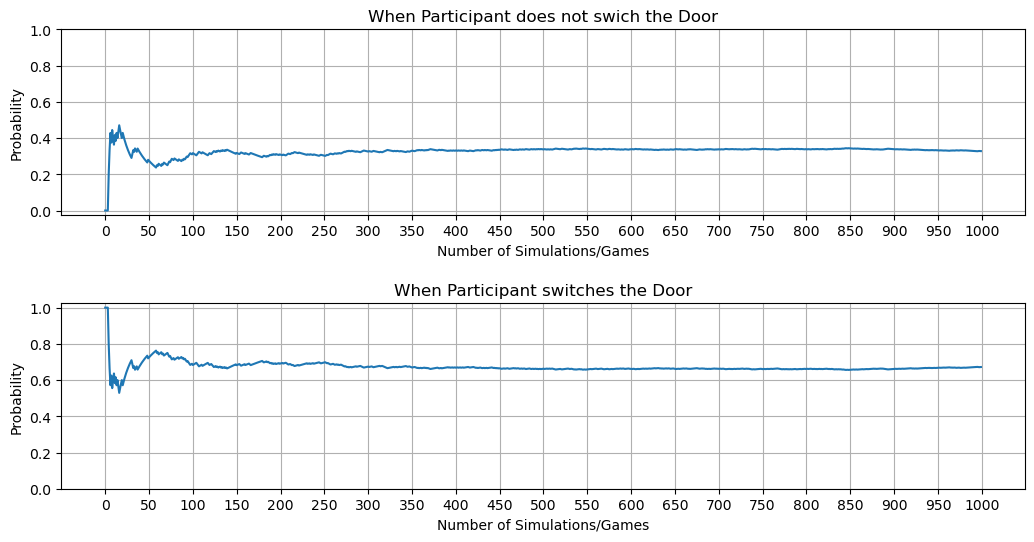

In [16]:
# Visualizing data
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=3)

no_switch['Probability'].plot(ax = axes[0], yticks = [0, 0.2, 0.4, 0.6, 0.8, 1],  xticks = range(0, 1050, 50), grid = True, figsize = (12,6),title='When Participant does not swich the Door', xlabel='Number of Simulations/Games', ylabel='Probability')
switch['Probability'].plot(ax = axes[1], yticks = [0, 0.2, 0.4, 0.6, 0.8, 1], xticks = range(0, 1050, 50), grid = True, figsize = (12,6), title='When Participant switches the Door', xlabel='Number of Simulations/Games', ylabel='Probability');

**CONCLUSION**

After a simulation of 1000 games, it is clear that when the particpiant switches the door (in a span of 1000 games), increases his/her chance of winning from approx. 30% to approx. 60%. 

This simulation with a python code solves this classical statistical problem by showcasing that switching is a better strategy.

## Part 3. Statistical Inference and Probability Distributions

In this part I will deal with basic concepts of statistical inference theory and probability distributions.

**Example 3.1**

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed.  Suppose a portfolio has an average annual return of 14.7% (i.e., an average gain on 14.7%) with a standard deviation of 33%.  A return of 0% means the value of the portfolio doesn't change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. Determine the following:

1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?
2. What is the cutoff for the highest 15% of annual returns with this portfolio?

For more information, see: https://en.wikipedia.org/wiki/Capital_asset_pricing_model 

In [17]:
# Encoding known values
mean = 0.147
std = 0.33

# 1.What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?4
negative_returns = stats.norm.cdf(0, mean, std)
print("Negative Returns (NR):", negative_returns)
percent_NR = round(negative_returns * 100, 2)
print("ANSWER: The percentage of years when portfolio lose money:",percent_NR,"%")

# 2. What is the cutoff for the highest 15% of annual returns with this portfolio?
cutoff_15 = stats.norm.ppf(1-0.15, mean, std)
print("Highest Top 15% Returns:", cutoff_15)
percent_c15 = round(cutoff_15 * 100, 2)
print("ANSWER: The percentage of years for the highest 15% of annual returns:", percent_c15,"%")

Negative Returns (NR): 0.3279956507031998
ANSWER: The percentage of years when portfolio lose money: 32.8 %
Highest Top 15% Returns: 0.4890230185329506
ANSWER: The percentage of years for the highest 15% of annual returns: 48.9 %


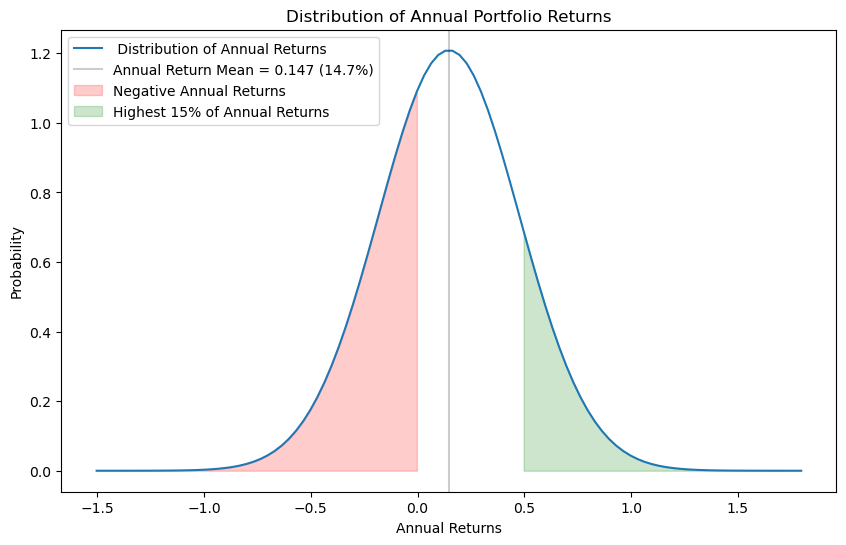

In [18]:
# Creating a distribution plot
plt.figure(figsize=(10, 6))
x = np.linspace(mean - 5 * std, mean + 5 * std, 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, label = " Distribution of Annual Returns")

# Adding text items to the plot
plt.title('Distribution of Annual Portfolio Returns')
plt.xlabel('Annual Returns')
plt.ylabel('Probability')

# Adding extra items: legend, mean line and filled spaces
plt.axvline(x = mean, color = 'black', label = 'Annual Return Mean = 0.147 (14.7%)', alpha = 0.2)
plt.fill_between(x, y, where = x<=0, color = 'red', alpha = 0.2, label = 'Negative Annual Returns')
plt.fill_between(x, y, where = x>=cutoff_15, color = 'green', alpha = 0.2, label = 'Highest 15% of Annual Returns')
plt.legend(fontsize = 10,loc = 2);

**Example 3.2**

Past experience indicates that because of low morale, a company loses 20 hours a year per employee due to lateness and abstenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.

The HR department implemented a new rewards system to increase employee morale, and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 14.

- Could you confirm that the new rewards system was effective with a 90% confidence?

In [19]:
# Encoding known variables
pop_hmean = 20
pop_std = 6
sample_size = 20 
sample_hmean = 14

print("Yearly average hours missed due to lateness or abstenteeism (population):", pop_hmean)
print("Standard deviation of the population:", pop_std)
print("Sample size:", sample_size)
print("Yearly average hours missed due to lateness or abstenteeism (sample):", sample_hmean)

# Could you confirm that the new rewards system was effective with a 90% confidence?

print("\nNull Hypthesis (H0): The new rewards systems has no effect on reducing abstenteesim (mean remains at 20 hours on avarage)\n")

# Calculating the standard error of the sample mean
se = pop_std / math.sqrt(sample_size)
print("Standard error (SE):", round(se,2))

# Calculating z-score and p-value
z_score = (sample_hmean - pop_hmean) / se
print("Z-Score:", round(z_score, 2))
p_value = stats.norm.cdf(z_score)
print(f"P-Value: {p_value:.10f}")

# Calculating significance level
conf = 0.9
sig_level = 1 - conf
print("Significance level:", round(sig_level, 2))

# Calulating critical value
crit_val = stats.norm.ppf(sig_level)
print("Critical value:", round(crit_val, 2))

# If the p-value is less than the significance level of 0.1, we reject the null hypothesis and 
# conclude that the new rewards system has a significant effect on reducing employee absenteeism.

if p_value < sig_level:
    print("\nANSWER: We can reject Null Hypothesis (H0), the new rewards system was effective with a 90% confidence level")
else:
    print("\nANSWER: We can accept Null Hypothesis (H0), the new rewards system was not effective with a 90% confidence level")

Yearly average hours missed due to lateness or abstenteeism (population): 20
Standard deviation of the population: 6
Sample size: 20
Yearly average hours missed due to lateness or abstenteeism (sample): 14

Null Hypthesis (H0): The new rewards systems has no effect on reducing abstenteesim (mean remains at 20 hours on avarage)

Standard error (SE): 1.34
Z-Score: -4.47
P-Value: 0.0000038721
Significance level: 0.1
Critical value: -1.28

ANSWER: We can reject Null Hypothesis (H0), the new rewards system was effective with a 90% confidence level
